# Deep-learning TP1: 

Le but de ce TP1 est d'acquérir les bases nécessaires à la compréhension des réseaux de neurones à partir d'un modèle simple de type Softmax. La tâche d'apprentissage consiste à classifier les images (28 par 28 pixels) de la base MNIST (http://yann.lecun.com/exdb/mnist/) en 10 catégories représentant les chiffres 0-9.

Le TP2 consistera à généraliser les concepts de ce TP1 à un réseau de neurones multi-couches.

## Téléchargement de la base d'entraînement

In [2]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

if("mnist.pkl.gz" not in os.listdir(".")):
    print('download mnist data')
    !wget http://deeplearning.net/data/mnist/mnist.pkl.gz

## Chargement de la base en mémoire

In [3]:
import dataset_loader
train_set, valid_set, test_set = dataset_loader.load_mnist()

Vous pouvez visualiser les différents caractères en changeant l'identifiant de l'image

In [3]:
img_id = 203
plt.imshow(train_set[0][img_id].reshape(28,28),cmap='Greys')
print("label: " + str(train_set[1][img_id]))

NameError: name 'train_set' is not defined

Question 1: Donner les caractéristiques de la base d'apprentissage train_set

In [6]:
def getDimDataset(train_set):
    X= train_set[0]
    Y = train_set[1]
    n_training = X.shape[0]
    n_feature = X.shape[1]
    n_label = len(set(Y))
    return n_training, n_feature, n_label

In [8]:
n_training, n_feature, n_label= getDimDataset(train_set)

## Création du modèle

In [9]:
def init(n_feature,n_label):
    sigma = 1.
    W = np.random.normal(loc=0.0, scale=sigma/np.sqrt(n_feature), size=(n_label,n_feature))
    b = np.zeros((W.shape[0],1))
    return W,b

Question 2: Donner les dimensions de W et b ainsi que le nombre total de paramètres du modèle

In [12]:
def printInfo(W,b):
    print("W dimensions: " + str(W.shape))
    print("b dimensions: " + str(b.shape))
    print("Number of parameters: " , W.shape[0]*W.shape[1]+b.shape[0])
    

In [13]:
W, b = init(n_feature, n_label)
printInfo(W,b)

W dimensions: (10, 784)
b dimensions: (10, 1)
('Number of parameters: ', 7850)


In [14]:
print(train_set[0].shape)

(50000, 784)


Question 3: Implémenter la fonction forward $$z_j = \sum_{i \rightarrow j} W_{ij} x_i + b_j$$ où $x_i$ est un pixel de l'image, $W_{ij}$ est la valeur associée à l'arête reliant les unités $i$ et $j$ et $b_j$ est le bias associé à l'unité $j$

In [20]:
def forward(W,b,X):
    """
        Perform the forward propagation
        :param W: the weights
        :param b: the bias
        :param X: the input (minibatch_size x n_input)
        :type W: ndarray
        :type B: ndarray
        :type X: ndarray
        :return: the transformed values
        :rtype: ndarray
    """
    
    
    Z= (np.dot(W,X.T)+b)
    
    
    return Z

In [21]:
X = train_set[0]
F = forward(W,b,X[0:100])
F.shape

(10, 100)

Question 4: Implémenter la fonction softmax $$ \sigma_i = P(t=i|x,W,b) = \frac{\exp{z_i}}{\sum_k \exp{z_k}}$$

In [17]:
def softmax(z):
    """
        Perform the softmax transformation to the pre-activation values
        :param z: the pre-activation values
        :type z: ndarray
        :return: the activation values
        :rtype: ndarray
    """
    p = np.max(z, 0)
    
    return np.exp(z-p)/np.sum(np.exp(z-p))

Optionnel: Vérifier que votre implémentation de softmax soit numériquement stable (cf. http://ufldl.stanford.edu/wiki/index.php/Exercise:Softmax_Regression)

In [18]:
# Example for testing the numerical stability of softmax
# It should return [1., 0. ,0.], not [nan, 0., 0.]
z = [1000000,1,100]
print(softmax(z))

[ 1.  0.  0.]


In [26]:
def gradient_out(out, one_hot_batch):
    """
    compute the gradient w.r.t. the pre-activation values of the softmax z_i
    :param out: the softmax values
    :type out: ndarray
    :param one_hot_batch: the one-hot representation of the labels
    :type one_hot_batch: ndarray
    :return: the gradient w.r.t. z
    :rtype: ndarray
    """
    
    dz = out - one_hot_batch
    
    return dz

Question 5: Implémenter le calcul du gradient de l'erreur par rapport à $z_i$:
$$\delta z_i = \sigma_i - 1_{i=l}$$
où $l$ est l'étiquette associée à la donnée courante.

In [ ]:
out = softmax(F)
derror = gradient_out(out, )


Question 6: Implémenter la fonction du calcul de gradient par rapport aux paramètres: $$\delta W_{ij} = \delta z_j x_i$$  $$\delta b_{j} = \delta z_j$$ où $\delta W_{ij}$ est la composante du gradient associée à l'arête reliant les unités $i$ et $j$, $\delta b_{j}$ est la composante du gradient associée au bias de l'unité $j$, $\delta z_j$ est le gradient de l'erreur par rapport à l'unité $j$ et $x_i$ est la valeur d'activation de l'unité $i$.

In [23]:
def gradient(derror, X):
    """
        Compute the gradient w.r.t. the parameters
        :param derror: the gradient w.r.t. z
        :param X: the input (minibatch_size x n_input)
        :param minibatch_size: the minibatch size
        :type derror: ndarray
        :type minibatch: ndarray
        :type minibatch_size: unsigned
        :return: the gradient w.r.t. the parameters
        :rtype: ndarray, ndarray
    """
    minibatch_size = X.shape[0]
    grad_w = derror.dot(X)/minibatch_size
    grad_b = np.sum(derror, axis =1).reshape(-1, 1)/minibatch_size
    return grad_w,grad_b

In [ ]:
grad_w, grad_b= gradient(derror, X)

Question 7: Implémenter la fonction de mise à jour des paramètres $$p = p - \eta \delta p$$ où $p$ est un paramètre du modèle et $\delta p$ la composante du gradient associée à p.

In [24]:
def update(eta, W, b, grad_w, grad_b):
    """
        Update the parameters with an update rule
        :param eta: the step-size
        :param W: the weights
        :param b: the bias
        :param grad_w: the gradient w.r.t. the weights
        :param grad_b: the gradient w.r.t. the bias
        :type eta: float
        :type W: ndarray
        :type b: ndarray
        :type grad_w: ndarray
        :type grad_b: ndarray
        :return: the updated parameters
        :rtype: ndarray, ndarray
    """
    
    W -= eta* grad_w
    b -= eta*grad_b
    
    return W,b

## Algorithme d'apprentissage

In [27]:
import math,time
from IPython.display import clear_output
from aux import *

# Data structures for plotting
g_i = []
g_train_loss=[]
g_train_acc=[]
g_valid_loss=[]
g_valid_acc=[]

n_training, n_feature, n_label = getDimDataset(train_set)

# SGD parameters
eta = 0.001
batch_size = 500
n_batch = int(math.ceil(float(n_training)/batch_size))
n_epoch = 100

cumul_time = 0.

# Initialize the model parameters
W,b = init(n_feature,n_label)
printInfo(W,b)

# Convert the labels to one-hot vector
one_hot = np.zeros((n_label,n_training))
one_hot[train_set[1],np.arange(n_training)]=1.

for i in range(n_epoch):
    for j in range(n_batch):

        ### Mini-batch creation
        minibatch, one_hot_batch, minibatch_size = getMiniBatch(j, batch_size, train_set, one_hot)

        prev_time = time.clock()

        ### Forward propagation
        Z = forward(W,b,minibatch)

        ### Compute the softmax
        out = softmax(Z)

        ### Compute the gradient at the top layer
        derror = gradient_out(out,one_hot_batch)

        ### Compute the gradient w.r.t. parameters
        grad_w,grad_b = gradient(derror, minibatch)

        ### Update the parameters
        W,b = update(eta, W, b, grad_w, grad_b)
        
        curr_time = time.clock()
        cumul_time += curr_time - prev_time
    
    ### Training accuracy
    train_loss, train_acc = computeLoss(W, b, train_set[0], train_set[1],softmax) 
    
    ### Valid accuracy
    valid_loss, valid_acc = computeLoss(W, b, valid_set[0], valid_set[1],softmax) 

    g_i = np.append(g_i, i)
    g_train_loss = np.append(g_train_loss, train_loss)
    g_train_acc = np.append(g_train_acc, train_acc)
    g_valid_loss = np.append(g_valid_loss, valid_loss)
    g_valid_acc = np.append(g_valid_acc, valid_acc)
    
    result_line = str(i) + " " + str(cumul_time) + " " + str(train_loss) + " " + str(train_acc) + " " + str(valid_loss) + " " + str(valid_acc) + " " + str(eta)
    print(result_line)

W dimensions: (10, 784)
b dimensions: (10, 1)
('Number of parameters: ', 7850)
0 0.277408 13.1848956716 0.08858 11.5845769268 0.0817 0.001
1 0.581935 13.0823203098 0.1472 11.4790817371 0.1429 0.001
2 0.819943 12.9858561096 0.2374 11.379865309 0.2407 0.001
3 1.055634 12.8971206997 0.3293 11.2883360364 0.3356 0.001
4 1.292459 12.8163035426 0.3985 11.204747942 0.4019 0.001
5 1.530918 12.7425328375 0.44554 11.1283606591 0.4514 0.001
6 1.769224 12.6749512997 0.47862 11.0582884015 0.4847 0.001
7 2.003965 12.6128705481 0.50468 10.9938338867 0.5104 0.001
8 2.241514 12.5557439612 0.52782 10.934326294 0.5371 0.001
9 2.47646 12.5030453947 0.54772 10.8792624599 0.5609 0.001
10 2.712113 12.4544059303 0.5666 10.8282531265 0.583 0.001
11 2.948027 12.4095105376 0.58312 10.780998749 0.6017 0.001
12 3.183126 12.3681704163 0.5958 10.7373147143 0.6159 0.001
13 3.418414 12.3301757302 0.60692 10.6970697847 0.6271 0.001
14 3.655582 12.2953310579 0.61662 10.6600424225 0.6383 0.001
15 3.892402 12.2634375801 0.

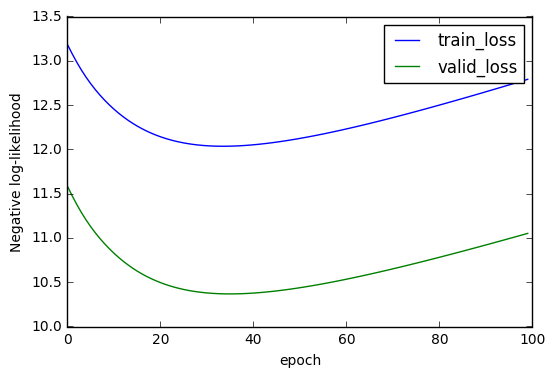

In [28]:
plt.plot(g_i,g_train_loss,label='train_loss')
plt.plot(g_i,g_valid_loss,label='valid_loss')
plt.xlabel("epoch")
plt.ylabel("Negative log-likelihood")
plt.legend()

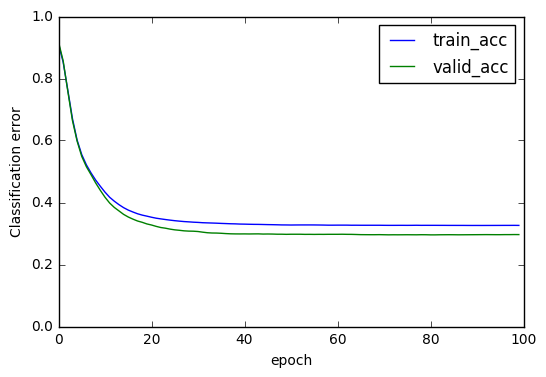

In [29]:
plt.plot(g_i,1.0-g_train_acc,label='train_acc')
plt.plot(g_i,1.0-g_valid_acc,label='valid_acc')
plt.xlabel("epoch")
plt.ylabel("Classification error")
plt.ylim([0.,1.])
plt.legend()

Question 8: Montrer, à l'aide d'une figure, l'effet du step-size (prendre $\eta$=[0.01,0.1,1.0,10.]) sur les courbes d'apprentissage